## Time Series Forecasting with ARIMA

In [2]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()


In [3]:
d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

In [4]:
data = yf.download('GOOG', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.tail())

          Date        Open        High         Low       Close   Adj Close  \
246 2024-04-19  157.750000  157.990005  153.910004  155.720001  155.720001   
247 2024-04-22  156.009995  159.184998  155.660004  157.949997  157.949997   
248 2024-04-23  158.589996  160.479996  157.964996  159.919998  159.919998   
249 2024-04-24  159.089996  161.389999  158.820007  161.100006  161.100006   
250 2024-04-25  153.360001  158.279999  152.768005  157.949997  157.949997   

       Volume  
246  20063900  
247  17243900  
248  16115400  
249  19485700  
250  35813900  


In [5]:
data = data[["Date", "Close"]]
print(data.head())

        Date       Close
0 2023-04-27  108.370003
1 2023-04-28  108.220001
2 2023-05-01  107.709999
3 2023-05-02  105.980003
4 2023-05-03  106.120003


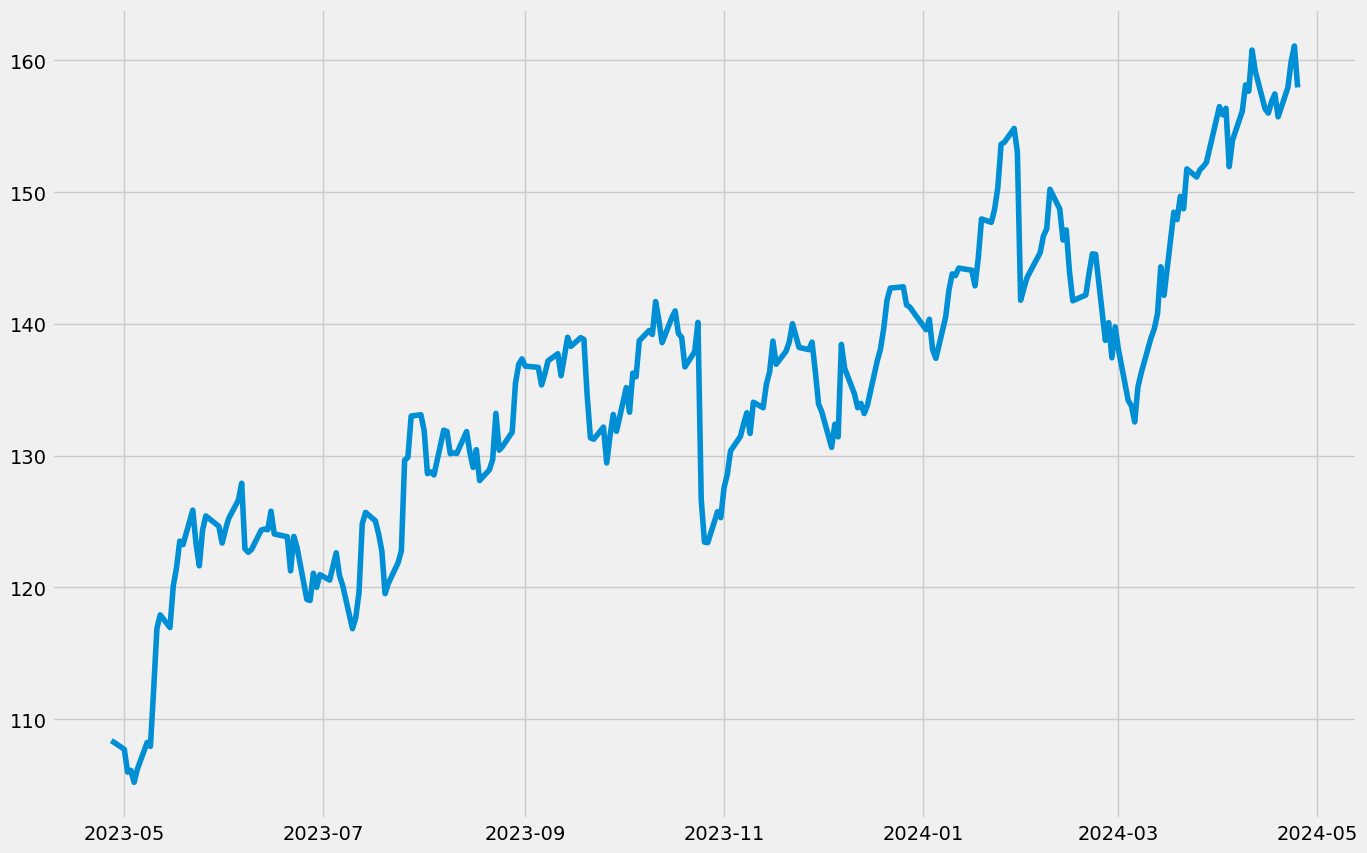

In [6]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Close"])

<Figure size 640x480 with 0 Axes>

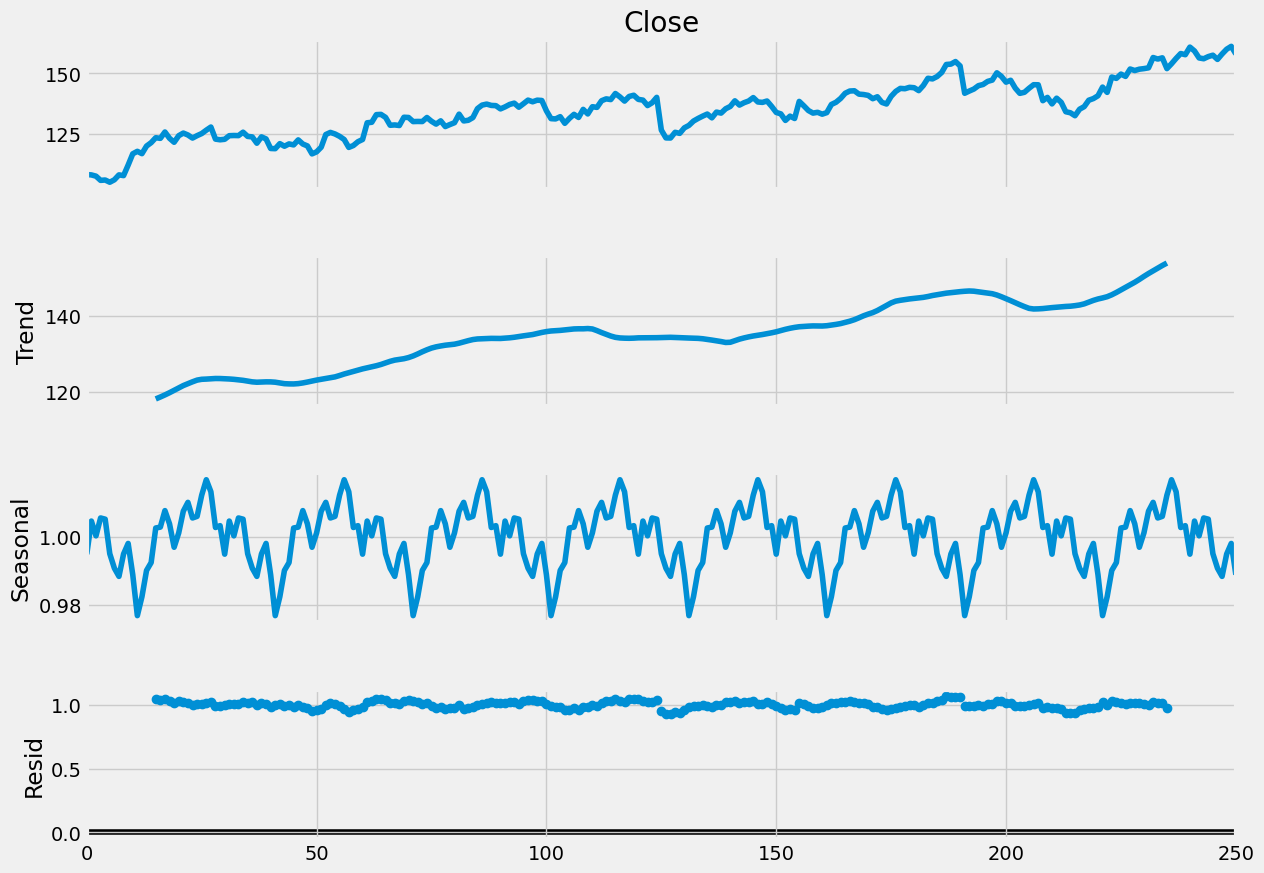

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["Close"], 
                            model='multiplicative', period = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

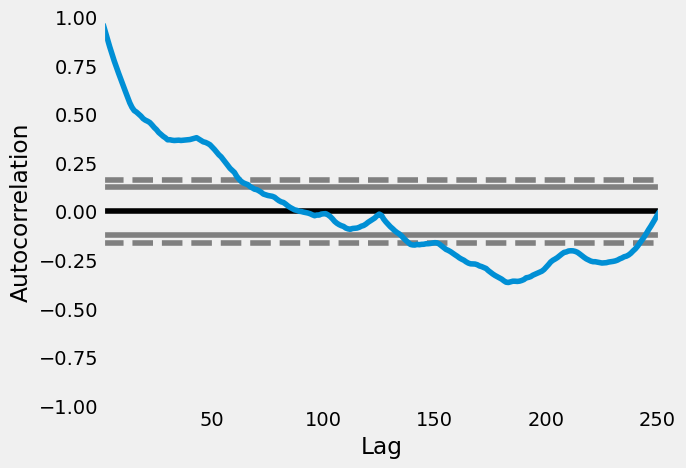

In [8]:
pd.plotting.autocorrelation_plot(data["Close"])

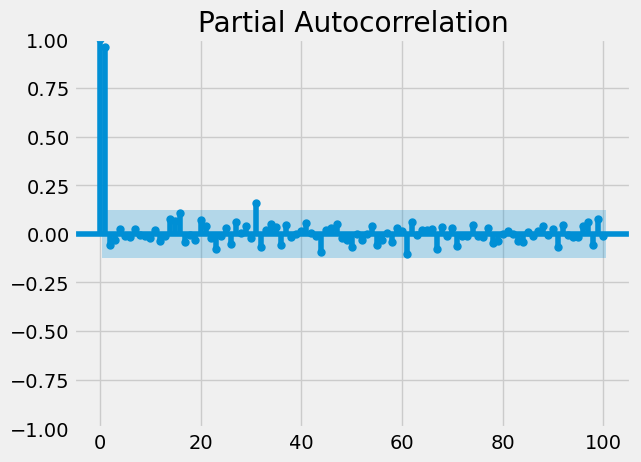

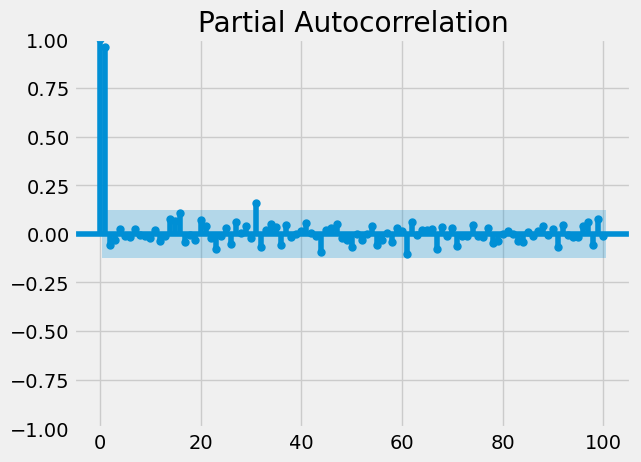

In [9]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Close"], lags = 100)

In [10]:
p, d, q = 5, 1, 2
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data["Close"], order=(p,d,q))  
fitted = model.fit()
print(fitted.summary())


C:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  251
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -559.483
Date:                Fri, 26 Apr 2024   AIC                           1134.966
Time:                        20:45:02   BIC                           1163.137
Sample:                             0   HQIC                          1146.304
                                - 251                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2501      0.164      7.619      0.000       0.929       1.572
ar.L2         -0.8366      0.183     -4.565      0.000      -1.196      -0.477
ar.L3         -0.1231      0.130     -0.947      0.3

In [11]:
predictions = fitted.predict()
print(predictions)

0        0.000000
1      108.370011
2      108.217866
3      107.697004
4      105.942804
          ...    
246    157.221894
247    155.873505
248    158.420903
249    160.638041
250    161.029544
Name: predicted_mean, Length: 251, dtype: float64


In [ ]:
import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(data['Close'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

C:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [13]:
predictions = model.predict(len(data), len(data)+10)
print(predictions)

251    157.352536
252    156.731142
253    156.927259
254    157.464155
255    158.409420
256    158.601704
257    157.710264
258    157.755202
259    157.548732
260    157.195217
261    157.837336
Name: predicted_mean, dtype: float64


<Axes: >

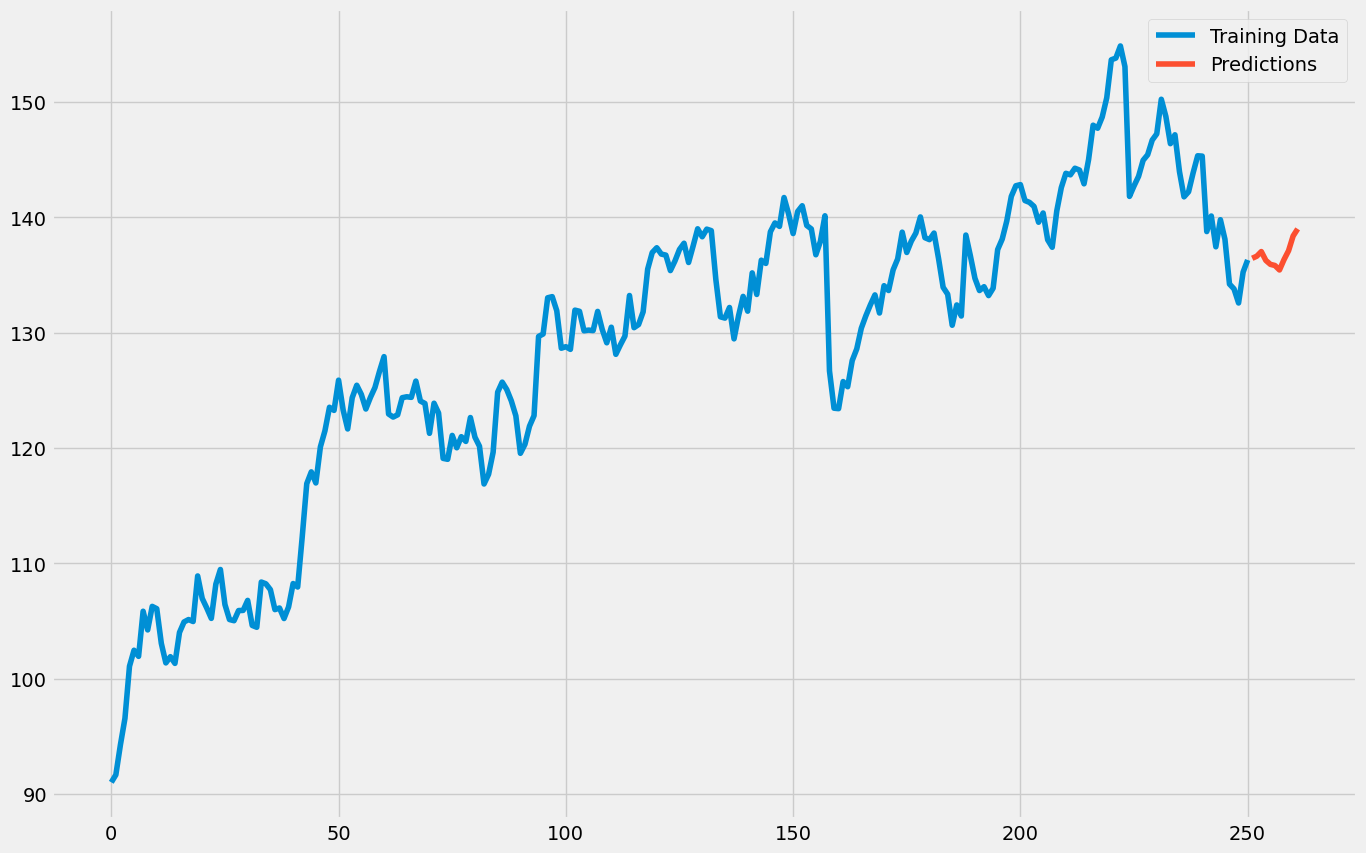

In [14]:
data["Close"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")

## Summary

ARIMA stands for Autoregressive Integrated Moving Average. It is an algorithm used for forecasting Time Series Data. If the data is stationary, we need to use ARIMA, if the data is seasonal, we need to use Seasonal ARIMA (SARIMA).